In [177]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

Earlier detection frameworks, looked at different parts of the image multiple times at different scales and repurposed image classification technique to detect objects. This approach is slow and inefficient.

YOLO takes entirely different approach. It looks at the entire image only once and goes through the network once and detects objects. Hence the name. It is very fast. That’s the reason it has got so popular.

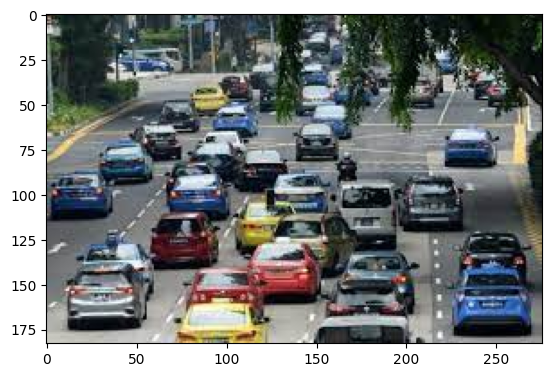

In [178]:
img=cv2.imread('cars.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [179]:
img.shape

(183, 276, 3)

In [180]:
height=img.shape[0]
width=img.shape[1]
height,width

(183, 276)

In [181]:
classes=None
with open('yolov3.txt' ,'r') as f:
    classes=[line.strip() for line in f.readlines()]
len(classes)
COLORS=np.random.uniform(0,255,size=(len(classes),3))

In [182]:
# scale=0.00392
scale=0.004

In [183]:
yolo=cv2.dnn.readNet('./yolov3.weights','./yolov3.cfg')
blob=cv2.dnn.blobFromImage(img,scale,(416,416),(0,0,0),swapRB=True,crop=False)

In [184]:
blob.shape

(1, 3, 416, 416)

In [185]:
yolo.setInput(blob)

In [186]:

output_layer_names=yolo.getUnconnectedOutLayersNames()
layer_output=yolo.forward(output_layer_names)

In [187]:
def draw_bounding_box(img,class_id,confidence,x,y,x_plus_w,y_plus_h):
    label=str(classes[class_id])
    color=COLORS[class_id]
    cv2.rectangle(img,(x,y),(x_plus_w,y_plus_h),color,2)
    cv2.putText(img,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)

In [188]:
layer_output[0].shape

(507, 85)

In [189]:
class_ids=[]
confidences=[]
boxes=[]
conf_threshold=0.5
nms_threshold=0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)

for out in layer_output:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence > 0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            x=center_x- w/2
            y=center_y -h/2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x,y,w,h])

In [190]:
indices=cv2.dnn.NMSBoxes(boxes,confidences,conf_threshold,nms_threshold)
for i in indices:
    # i=i[0]
    box=boxes[i]
    x=box[0]
    y=box[1]
    w=box[2]
    h=box[3]
    draw_bounding_box(img,class_ids[i],confidences[i],round(x),round(y),round(x+w),round(y+h))



In [191]:
indices

array([38, 14, 49, 23, 56, 65, 44, 26, 52, 66, 46, 67, 61, 10, 30,  4, 34,
       29, 15,  5, 59, 32,  6, 62,  8])

In [197]:
print(len(boxes))

68


In [193]:
# cv2.imshow("object detection", img)

# # wait until any key is pressed
# cv2.waitKey()
    
#  # save output image to disk
# cv2.imwrite("object-detection.jpg", img)

# # release resources
# cv2.destroyAllWindows()


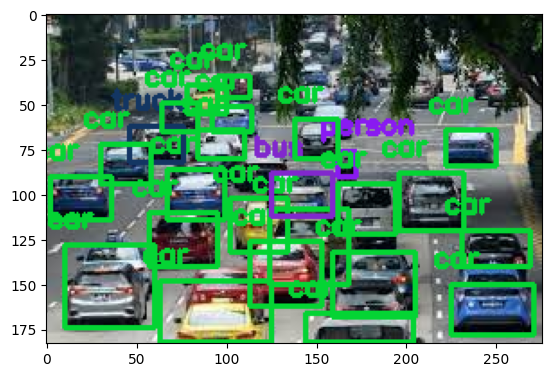

In [194]:
# img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGBA)
plt.imshow(img)